# Ensemble Learning


In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d fatemehmehrparvar/obesity-levels
import zipfile
with zipfile.ZipFile('obesity-levels.zip', 'r') as zip_ref:
    zip_ref.extractall()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

#IMPORTANT : upload kaggle.json
# Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels
License(s): Attribution 4.0 International (CC BY 4.0)
obesity-levels.zip: Skipping, found more recently modified local copy (use --force to force download)


Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.98      0.94        54
      Normal_Weight       0.83      0.69      0.75        58
     Obesity_Type_I       0.88      0.94      0.91        70
    Obesity_Type_II       0.95      0.98      0.97        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.71      0.78      0.74        58
Overweight_Level_II       0.81      0.72      0.76        58

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.87       423
       weighted avg       0.87      0.87      0.87       423



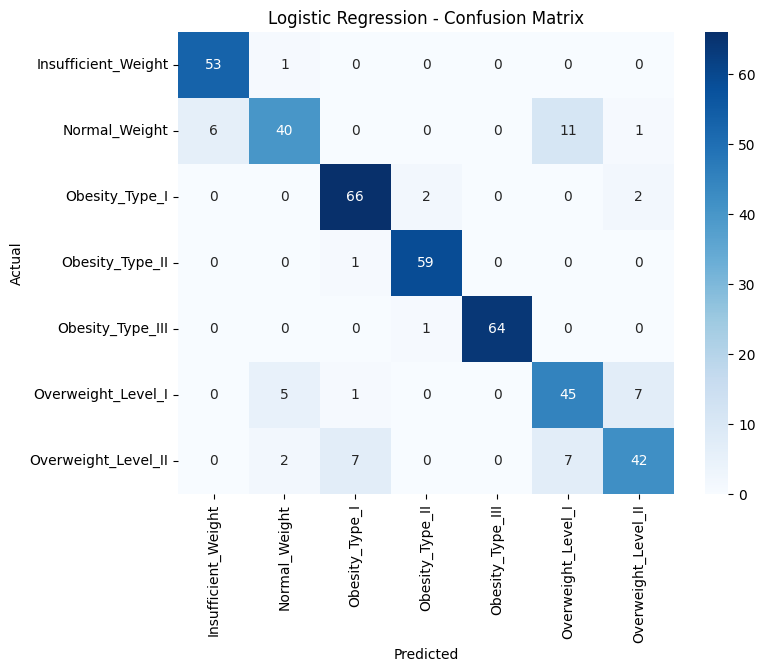

Random Forest Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.84      0.98      0.90        58
     Obesity_Type_I       0.96      0.97      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.90      0.93        58
Overweight_Level_II       0.96      0.95      0.96        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



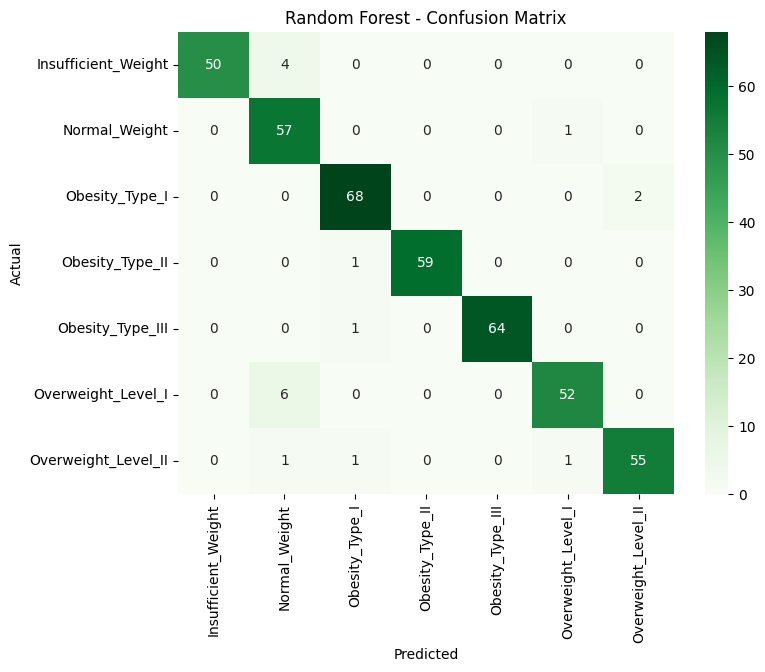

Gradient Boosting Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.91      0.95        54
      Normal_Weight       0.86      0.98      0.92        58
     Obesity_Type_I       0.97      0.97      0.97        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.91      0.92        58
Overweight_Level_II       1.00      0.98      0.99        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



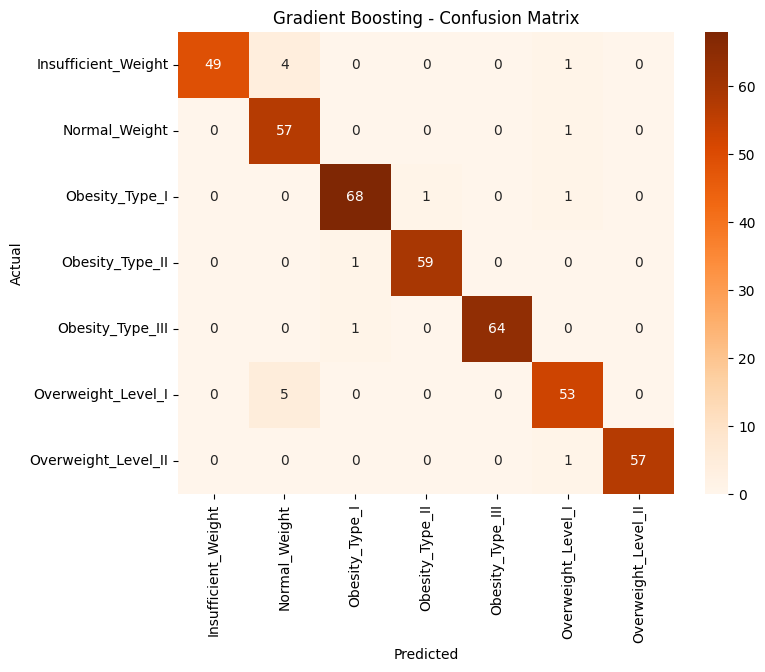

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:50:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.91      0.93        54
      Normal_Weight       0.83      0.95      0.89        58
     Obesity_Type_I       0.97      0.99      0.98        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.90      0.93        58
Overweight_Level_II       0.98      0.97      0.97        58

           accuracy                           0.96       423
          macro avg       0.96      0.95      0.95       423
       weighted avg       0.96      0.96      0.96       423



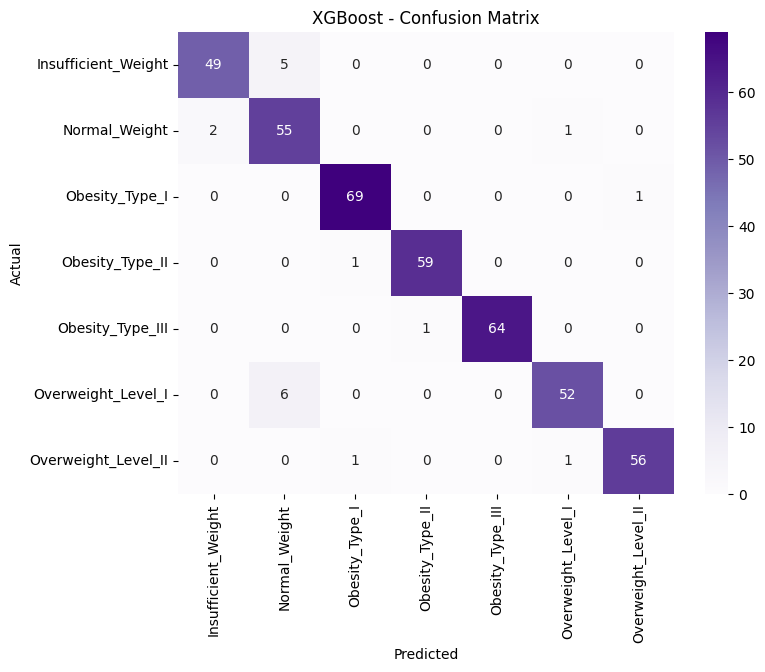

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

data = df.copy()

target_col = "NObeyesdad"
X = data.drop(columns=[target_col])
y = data[target_col]

categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["float64", "int64"]).columns

X_encoded = X.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_preds, target_names=target_encoder.classes_))

rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

print("Gradient Boosting Classification Report:\n")
print(classification_report(y_test, gb_preds, target_names=target_encoder.classes_))

gb_cm = confusion_matrix(y_test, gb_preds)
plt.figure(figsize=(8,6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("XGBoost Classification Report:\n")
print(classification_report(y_test, xgb_preds, target_names=target_encoder.classes_))

xgb_cm = confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(8,6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


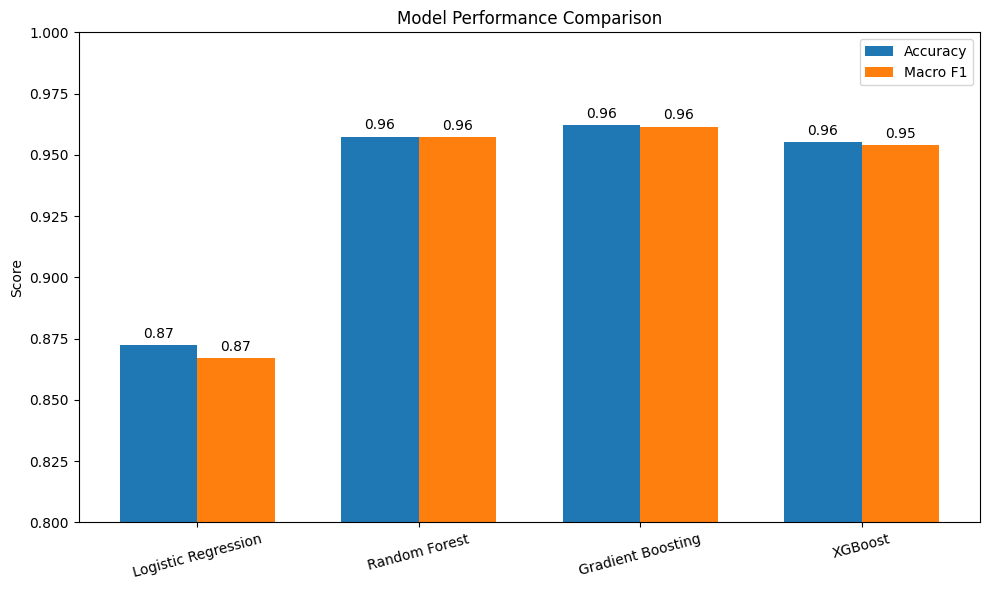

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

models = {
    "Logistic Regression": lr.predict(X_test),
    "Random Forest": rf_preds,
    "Gradient Boosting": gb_preds,
    "XGBoost": xgb_preds
}

accuracies = []
f1_scores = []

for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')
    accuracies.append(acc)
    f1_scores.append(f1)

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
bars2 = ax.bar(x + width/2, f1_scores, width, label='Macro F1')

ax.bar_label(bars1, fmt='%.2f', padding=3)
ax.bar_label(bars2, fmt='%.2f', padding=3)

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models.keys(), rotation=15)
ax.legend()
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:15:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Voting Classifier (Soft) Report:

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.86      0.98      0.92        58
     Obesity_Type_I       0.99      0.99      0.99        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.98      0.91      0.95        58
Overweight_Level_II       0.98      1.00      0.99        58

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



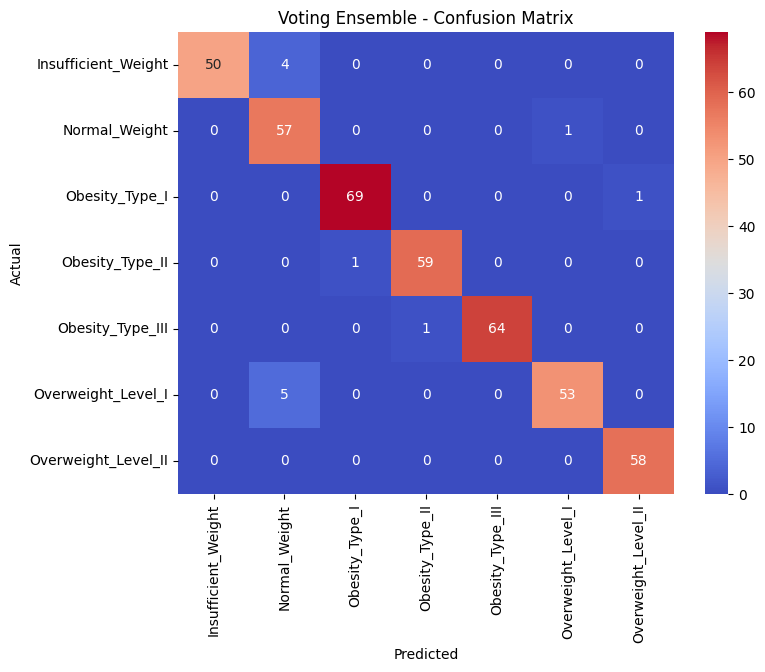

In [ ]:
from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
    ],
    voting='soft'  # Use 'hard' for majority vote, 'soft' for probability averaging
)


voting_clf.fit(X_train, y_train)
voting_preds = voting_clf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix
print("📊 Voting Classifier (Soft) Report:\n")
print(classification_report(y_test, voting_preds, target_names=target_encoder.classes_))


voting_cm = confusion_matrix(y_test, voting_preds)
plt.figure(figsize=(8,6))
sns.heatmap(voting_cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title("Voting Ensemble - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
